# **Proyecto EDA - Exploratory Data Analysis**

# Año 2024

In [2]:
4+5

9

In [3]:
#Importamos todas las bibliotecas que vamos a necesitar:
import numpy as np
import pandas as pd
pd.options.mode.copy_on_write = True
import matplotlib.pyplot as plt
import seaborn as sns
import unicodedata
import squarify

## Limpieza de datos

En primer lugar, cargamos el dataset de accidentes intraurbanos de Madrid para el año 2020

In [4]:
direccion="./Datasets/2024_Accidentalidad.csv"
df_accidentes_2024=pd.read_csv(direccion, sep=";", encoding="utf-8")

y visualizamos la información general del dataset:

In [5]:
#Hechamos un vistazo a las 5 primeras filas:
df_accidentes_2024.head(5)

,num_expediente,fecha,hora,localizacion,numero,cod_distrito,distrito,tipo_accidente,estado_meteorológico,tipo_vehiculo,tipo_persona,rango_edad,sexo,cod_lesividad,lesividad,coordenada_x_utm,coordenada_y_utm,positiva_alcohol,positiva_droga
0,2023S040280,04/01/2024,14:09:00,AVDA. NICETO ALCALA ZAMORA / AUTOV. M-11,3,16,HORTALEZA,Colisión fronto-lateral,Lluvia débil,Motocicleta > 125cc,Conductor,De 55 a 59 años,Hombre,2.0,Ingreso inferior o igual a 24 horas,444913.0,4481427.0,N,NaN
1,2023S040280,04/01/2024,14:09:00,AVDA. NICETO ALCALA ZAMORA / AUTOV. M-11,3,16,HORTALEZA,Colisión fronto-lateral,Lluvia débil,Turismo,Conductor,De 55 a 59 años,Mujer,14.0,Sin asistencia sanitaria,444913.0,4481427.0,N,NaN
2,2023S040309,15/02/2024,14:05:00,CALL. TESORO / CALL. MINAS,18,1,CENTRO,Colisión fronto-lateral,Lluvia débil,Bicicleta,Conductor,De 25 a 29 años,Hombre,7.0,Asistencia sanitaria sólo en el lugar del acci...,440123.0,4475170.0,N,NaN
3,2023S040309,15/02/2024,14:05:00,CALL. TESORO / CALL. MINAS,18,1,CENTRO,Colisión fronto-lateral,Lluvia débil,Motocicleta hasta 125cc,Conductor,De 35 a 39 años,Hombre,14.0,Sin asistencia sanitaria,440123.0,4475170.0,N,NaN
4,2023S040310,18/02/2024,10:40:00,GTA. RUIZ JIMENEZ / CALL. SAN BERNARDO,3,7,CHAMBERÍ,Colisión lateral,Despejado,Turismo,Conductor,De 25 a 29 años,Hombre,NaN,NaN,440137.0,4475721.0,N,NaN


In [6]:
#Visualizamos información general del dataframe:
print(f"La base de datos tiene {len(df_accidentes_2024.columns)} campos y {len(df_accidentes_2024)} registros.")
print(1*"\n")
df_accidentes_2024.info()

La base de datos tiene 19 campos y 49340 registros.


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49340 entries, 0 to 49339
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   num_expediente        49340 non-null  object 
 1   fecha                 49340 non-null  object 
 2   hora                  49340 non-null  object 
 3   localizacion          49340 non-null  object 
 4   numero                49340 non-null  object 
 5   cod_distrito          49340 non-null  int64  
 6   distrito              49340 non-null  object 
 7   tipo_accidente        49335 non-null  object 
 8   estado_meteorológico  43424 non-null  object 
 9   tipo_vehiculo         48946 non-null  object 
 10  tipo_persona          49340 non-null  object 
 11  rango_edad            49340 non-null  object 
 12  sexo                  49340 non-null  object 
 13  cod_lesividad         27344 non-null  float64
 14  lesividad       

In [7]:
#Obtenemos información de las variables numéricas:
#Variables numéricas: cod_lesividad, coordenada_x_utm, coordenada_y_utm, positiva_alcohol
df_accidentes_2024.describe()

,cod_distrito,cod_lesividad,coordenada_x_utm,coordenada_y_utm,positiva_droga
count,49340.000000,27344.000000,49334.000000,4.933400e+04,203.0
mean,9.771403,10.331115,442073.609134,4.474661e+06,1.0
std,5.635245,4.697545,3475.946377,3.962806e+03,0.0
min,1.000000,1.000000,429177.000000,4.463657e+06,1.0
25%,5.000000,7.000000,439893.000000,4.471611e+06,1.0
50%,10.000000,14.000000,441749.000000,4.474652e+06,1.0
75%,14.000000,14.000000,443998.000000,4.477470e+06,1.0
max,21.000000,77.000000,454754.000000,4.492208e+06,1.0


Después, comprobamos si hay duplicados:

In [8]:
duplicados=df_accidentes_2024[df_accidentes_2024.duplicated(keep=False)]
duplicados.shape
#Hay 3161 duplicados (Keep =False)

(3592, 19)

In [9]:
#Eliminamos los duplicados, quedandonos con el primero (keep = first):
df_accidentes_2024_sin_duplicados=df_accidentes_2024.drop_duplicates(keep = "first")

In [10]:
#Comprobamos las nuevas dimensiones del dataframe:
df_accidentes_2024_sin_duplicados.shape

(47287, 19)

Generamos una copia del dataset sin duplicados:

In [11]:
#Generamos una copia:
df_24=df_accidentes_2024_sin_duplicados.copy()

Generamos una tabla que incluya número de nulos, cardinalidad  y tipificación de las variables:

In [12]:
#Obtenemos número de nulos y cardinalidad de todas las variables
#Creamos el df de tipificación
def nulos_cardinalidad(df,umbral_categoria, umbral_continua):
    nulls=df.isna().sum().sort_values(ascending=False)
    nulls_rel=(df.isna().sum()/len(df)*100).sort_values(ascending=False)
    card=df.nunique()
    card_rel=df.nunique()/len(df)*100
    tipo=df.dtypes
    df_tipificacion= pd.DataFrame([nulls, nulls_rel, card, card_rel, tipo]).T.rename(columns = {0: "Nulls", 1: "Nulls_rel", 2: "Card", 3: "Card_rel", 4: "Tipo"}) #hace falta poner corchetes
    #Generamos columna "Clasificada_como:"
    # df_tipificacion["Clasificada_como"]="sin categoría" #partimos asumiendo que todas son categoricas
    # df_tipificacion.loc[df_tipificacion.Card == 2, "Clasificada_como"] = "Binaria"
    # df_tipificacion.loc[df_tipificacion.Tipo == "datetime64[ns]", "Clasificada_como"] = "Fecha"
    # df_tipificacion.loc[(df_tipificacion.Card > 2) & (df_tipificacion.Card < umbral_categoria), "Clasificada_como"] = "Categórica"
    # df_tipificacion.loc[(df_tipificacion.Tipo == "float64") & (df_tipificacion.Card > 2) & (df_tipificacion.Card < umbral_categoria), "Clasificada_como"] = "Numérica ordinal"
    # df_tipificacion.loc[(df_tipificacion.Tipo == "float64") & (df_tipificacion.Card > umbral_categoria) & (df_tipificacion.Card_rel < umbral_continua), "Clasificada_como"] = "Numérica discreta"
    # df_tipificacion.loc[(df_tipificacion.Tipo == "float64") & (df_tipificacion.Card_rel > umbral_continua), "Clasificada_como"] = "Numérica continua"
    return df_tipificacion

In [13]:
df_tipificacion=nulos_cardinalidad(df_24,38,30)
df_tipificacion

,Nulls,Nulls_rel,Card,Card_rel,Tipo
positiva_droga,47084,99.570707,1,0.002115,float64
lesividad,20333,42.999133,9,0.019033,object
cod_lesividad,20333,42.999133,9,0.019033,float64
estado_meteorológico,5579,11.798169,7,0.014803,object
tipo_vehiculo,389,0.822636,32,0.067672,object
positiva_alcohol,167,0.353163,2,0.004229,object
coordenada_x_utm,6,0.012688,10131,21.424493,float64
coordenada_y_utm,6,0.012688,10997,23.255863,float64
tipo_accidente,5,0.010574,12,0.025377,object
num_expediente,0,0.0,20698,43.771015,object


Procedemos a la limpieza de datos. Primero, tratamos los nulos de los diferentes campos:

In [14]:
#Contabilizamos el número de nulos por campo:
df_24.isna().sum()

num_expediente              0
fecha                       0
hora                        0
localizacion                0
numero                      0
cod_distrito                0
distrito                    0
tipo_accidente              5
estado_meteorológico     5579
tipo_vehiculo             389
tipo_persona                0
rango_edad                  0
sexo                        0
cod_lesividad           20333
lesividad               20333
coordenada_x_utm            6
coordenada_y_utm            6
positiva_alcohol          167
positiva_droga          47084
dtype: int64

In [15]:
#TRATAMOS LOS NULOS

#Eliminamos dobles espacios y unificamos el formato de los campos: "num_expediente", "localizacion", "numero"
cols_string = ["num_expediente", "localizacion", "numero"] 
for col in cols_string: 
    df_24[col] = df_24[col].astype(str).str.lower().str.strip().str.replace(r"\s+", " ", regex=True)

    
# A. ESTADO METEOROLÓGICO
df_24['estado_meteorológico'] = df_24['estado_meteorológico'].fillna("Se desconoce") 


# B. TIPO DE PERSONA Y VEHÍCULO 

mask_no_aplica = df_24['tipo_persona'].str.lower().isin(['peatón', 'testigo']) 
# Peatón y testigo → No aplica 
df_24['tipo_vehiculo'] = df_24['tipo_vehiculo'].fillna('No consta')
df_24.loc[mask_no_aplica & df_24['tipo_vehiculo'].isna(), 'tipo_vehiculo' ] = 'No aplica' 

# C. LESIVIDAD (ORDINAL) 
df_24['cod_lesividad'] = df_24['cod_lesividad'].fillna(14) 
df_24['lesividad'] = df_24['lesividad'].fillna('Sin asistencia sanitaria') 

# D. ALCOHOL Y DROGAS 
df_24['positiva_alcohol'] = df_24['positiva_alcohol'].fillna('No consta') 
df_24['positiva_droga'] = df_24['positiva_droga'].fillna('No consta') 

#E. Quedan 17 nulos, los eliminamos (47287 ---> 47277 registros)
df_24=df_24.dropna()


In [16]:
#Nuevas dimensiones del dataset:
df_24.shape

(47277, 19)

In [17]:
#MODIFICAMOS VARIABLES CATEGÓRICAS:

#Convertimos los campos de fecha y hora a datetime y creamos una nueva columna:
df_24["fecha"] = pd.to_datetime(df_24["fecha"], errors="coerce", dayfirst=True) 
df_24["hora"] = pd.to_datetime(df_24["hora"], format="%H:%M:%S", errors="coerce").dt.time 
df_24["fecha_hora"] = df_24.apply( 
                            lambda row: pd.Timestamp.combine(row["fecha"], row["hora"])
                            if pd.notnull(row["fecha"]) and pd.notnull(row["hora"])
                            else pd.NaT,
                            axis=1 )


#Simplificamos la variable categórica lesividad:
df_24["lesividad"] = df_24["cod_lesividad"].replace({
    1: "Leve",
    2: "Leve",
    3: "Grave",
    4: "Fallecido",
    5: "Leve",
    6: "Leve",
    7: "Leve",
    14: "Sin asistencia sanitaria",
    77: "Se desconoce"
})

#Reemplazamos los valores del campo positiva_alcohol:
df_24["positiva_alcohol"] = df_24["positiva_alcohol"].replace(
    {"S":"Positivo",
     "N":"Negativo"}
)

#Creamos categoría de franjas horarias:
df_24['franja_horaria'] = pd.cut(
        df_24['fecha_hora'].dt.hour,
        bins=[0,6,12,18,24],
        labels=['Madrugada','Mañana','Tarde','Noche'],
        right=False
    )

# Convertir la columna a tipo Categórico con el orden específico:
orden_edad = [
    "Menor de 5 años",
    "De 6 a 9 años",
    "De 10 a 14 ",
    "De 15 a 17 años",
    "De 18 a 20 años",
    "De 21 a 24 años",
    "De 25 a 29 años",
    "De 30 a 34 años",
    "De 35 a 39 años",
    "De 40 a 44 años",
    "De 45 a 49 años",
    "De 50 a 54 años",
    "De 55 a 59 años",
    "De 60 a 64 años",
    "De 65 a 69 años",
    "De 70 a 74 años",
    "Más de 74 años"
]
df_24['rango_edad'] = pd.Categorical(df_24['rango_edad'], categories=orden_edad, ordered=True)



In [18]:
df_24.shape

(47277, 21)

In [19]:
#Eliminamos las columnas cod_distrito, cod_lesividad y positiva_droga:
df_24=df_24.drop(columns=["cod_distrito", "cod_lesividad", "positiva_droga"])

In [20]:
#Nuevas dimensiones del dataset:
df_24.shape

(47277, 18)

In [21]:
# 7. CONVERTIR A CATEGORY (DESPUÉS DE IMPUTAR). Está ordenado
cols_category = ['distrito',
                 'tipo_accidente',
                 'estado_meteorológico', 
                 'tipo_vehiculo', 
                 'tipo_persona', 
                 'rango_edad', 
                 'sexo',  
                 'lesividad', 
                 ] 
for col in cols_category: 
    df_24[col] = df_24[col].astype('category')


Finalmente, visualizamos los valores de las variables categóricas (category):

In [22]:
for categoria in cols_category:
    frec_abs=df_24[categoria].value_counts(dropna=False)
    frec_rel=df_24[categoria].value_counts(dropna=False, normalize=True)*100
    df_frec=pd.concat([frec_abs, frec_rel], axis=1)
    df_frec.columns=["Frec. Absoluta", "Frec. Relativa (%)"]

    print(f"Resumen de {categoria}:")
    print(df_frec)
    print(f"Su cardinalidad es: {df_tipificacion.loc[categoria, "Card"]}")
    print("\n"*2)

Resumen de distrito:
                     Frec. Absoluta  Frec. Relativa (%)
distrito                                               
PUENTE DE VALLECAS             3801            8.039850
CHAMARTÍN                      3453            7.303763
CARABANCHEL                    3323            7.028788
SALAMANCA                      3168            6.700933
CIUDAD LINEAL                  2901            6.136176
CENTRO                         2733            5.780824
ARGANZUELA                     2582            5.461429
RETIRO                         2449            5.180109
FUENCARRAL-EL PARDO            2378            5.029930
MONCLOA-ARAVACA                2283            4.828987
TETUÁN                         2253            4.765531
LATINA                         2200            4.653426
SAN BLAS-CANILLEJAS            2191            4.634389
CHAMBERÍ                       2110            4.463058
USERA                          1970            4.166931
HORTALEZA                  

## Análisis univariante

### Tendencias centrales

Miro la moda de las variables categóricas (ordenadas según el número de importancia) para ver qué valores tienen mayor frecuencia absoluta

In [23]:
df_24[cols_category].mode().T


,0
distrito,PUENTE DE VALLECAS
tipo_accidente,Colisión fronto-lateral
estado_meteorológico,Despejado
tipo_vehiculo,Turismo
tipo_persona,Conductor
rango_edad,De 45 a 49 años
sexo,Hombre
lesividad,Sin asistencia sanitaria


Para el análisis temporal y geográfico, generamos un dataframe de accidentes únicos:

In [24]:
#Función que genera un dataframe de accidentes únicos:
def preparar_accidentes_unicos(df, col_id='num_expediente'):
    """
    Devuelve un DataFrame con accidentes únicos (agregados por num_expediente),
    usando la columna fecha_hora ya existente.
    """

    # Asegurar que fecha_hora es datetime
    df['fecha_hora'] = pd.to_datetime(df['fecha_hora'], errors='coerce')

    # Agregación por expediente (1 fila = 1 accidente)
    df_unicos = df.groupby(col_id).agg({
        'fecha_hora': 'min',
        'tipo_accidente': 'first',
        'tipo_vehiculo': lambda x: list(x.unique()),
        'distrito': 'first',
        'estado_meteorológico': 'first',
        'rango_edad': 'first',
        'tipo_persona': 'first',
        'sexo': 'first',
        'positiva_alcohol': 'first',
    }).reset_index()

    # Variables temporales derivadas
    df_unicos['año'] = df_unicos['fecha_hora'].dt.year
    df_unicos['mes'] = df_unicos['fecha_hora'].dt.month
    df_unicos['dia_semana'] = df_unicos['fecha_hora'].dt.day_name()
    df_unicos['hora'] = df_unicos['fecha_hora'].dt.hour

    df_unicos['franja'] = pd.cut(
        df_unicos['hora'],
        bins=[0,6,12,18,24],
        labels=['Madrugada','Mañana','Tarde','Noche'],
        right=False
    )

    return df_unicos

In [25]:
df_24_unicos=preparar_accidentes_unicos(df_24)

In [26]:
print(f"En 2020, sucedieron {len(df_24_unicos)} accidentes intraurbanos en la ciudad de Madrid")

En 2020, sucedieron 20692 accidentes intraurbanos en la ciudad de Madrid


### Análisis temporal

Dibujamos la frecuencia de accidentes a diferentes escalas temporales (Figura 1):

In [27]:
#FIGURA 1 (VERSIÓN 1)
#Función de variables temporales (versión 1):

def plot_temporal_univariate(df, col_datetime='fecha_hora', por_año=False):
    """
    Genera gráficos univariantes temporales sobre accidentes únicos:
    - Accidentes por mes
    - Accidentes por día de la semana
    - Accidentes por hora
    - Accidentes por franja horaria
    - Evolución diaria (línea + media móvil)
    """
    if por_año:
        for año, df_año in df.groupby('año'):
            print(f"\n=== Gráficos para el año {año} ===")
            _graficos(df_año, col_datetime, titulo_extra=f"Año {año}")
    else:
        _graficos(df, col_datetime, titulo_extra="Global")

def _graficos(df, col_datetime, titulo_extra=""):

    fig_1, axes = plt.subplots(3, 2, figsize=(16, 14))
    axes = axes.flatten()  # Para indexar fácilmente

    # 1. Accidentes por mes
    ax1= df['mes'].value_counts().sort_index().plot(
        kind='bar', ax=axes[0], color="steelblue",
        title=f'Accidentes por mes ({titulo_extra})'
    )
    ax1.bar_label(ax1.containers[0])

    # 2. Accidentes por día de la semana
    ax1=df['dia_semana'].value_counts().plot(
        kind='bar', ax=axes[1], color="darkcyan",
        title=f'Accidentes por día de la semana ({titulo_extra})'
    )
    ax1.bar_label(ax1.containers[0])

    # 3. Accidentes por hora
    ax2=df['hora'].value_counts().sort_index().plot(
        kind='bar', ax=axes[2], color="darkorange", 
        title=f'Accidentes por hora ({titulo_extra})'
    )
    ax2.bar_label(ax2.containers[0])
    # 4. Accidentes por franja horaria
    
    ax3=df['franja'].value_counts().plot(
        kind='bar', ax=axes[3], color="mediumseagreen",
        title=f'Accidentes por franja horaria ({titulo_extra})'
    )
    ax3.bar_label(ax3.containers[0])

    # 5. Evolución diaria
    serie_diaria = df.resample('D', on=col_datetime).size()
    serie_diaria.plot(
        kind='line', ax=axes[4], title=f'Evolución diaria ({titulo_extra})'
    )
    axes[4].set_ylabel("Número de accidentes")
   

    # 6. Media móvil 7 días
    serie_diaria.rolling(window=7).mean().plot(
        kind='line', ax=axes[5],
        title=f'Evolución diaria suavizada (media móvil 7 días) ({titulo_extra})'
    )
    axes[5].set_ylabel("Número de accidentes")
    
    plt.tight_layout()
    plt.show()


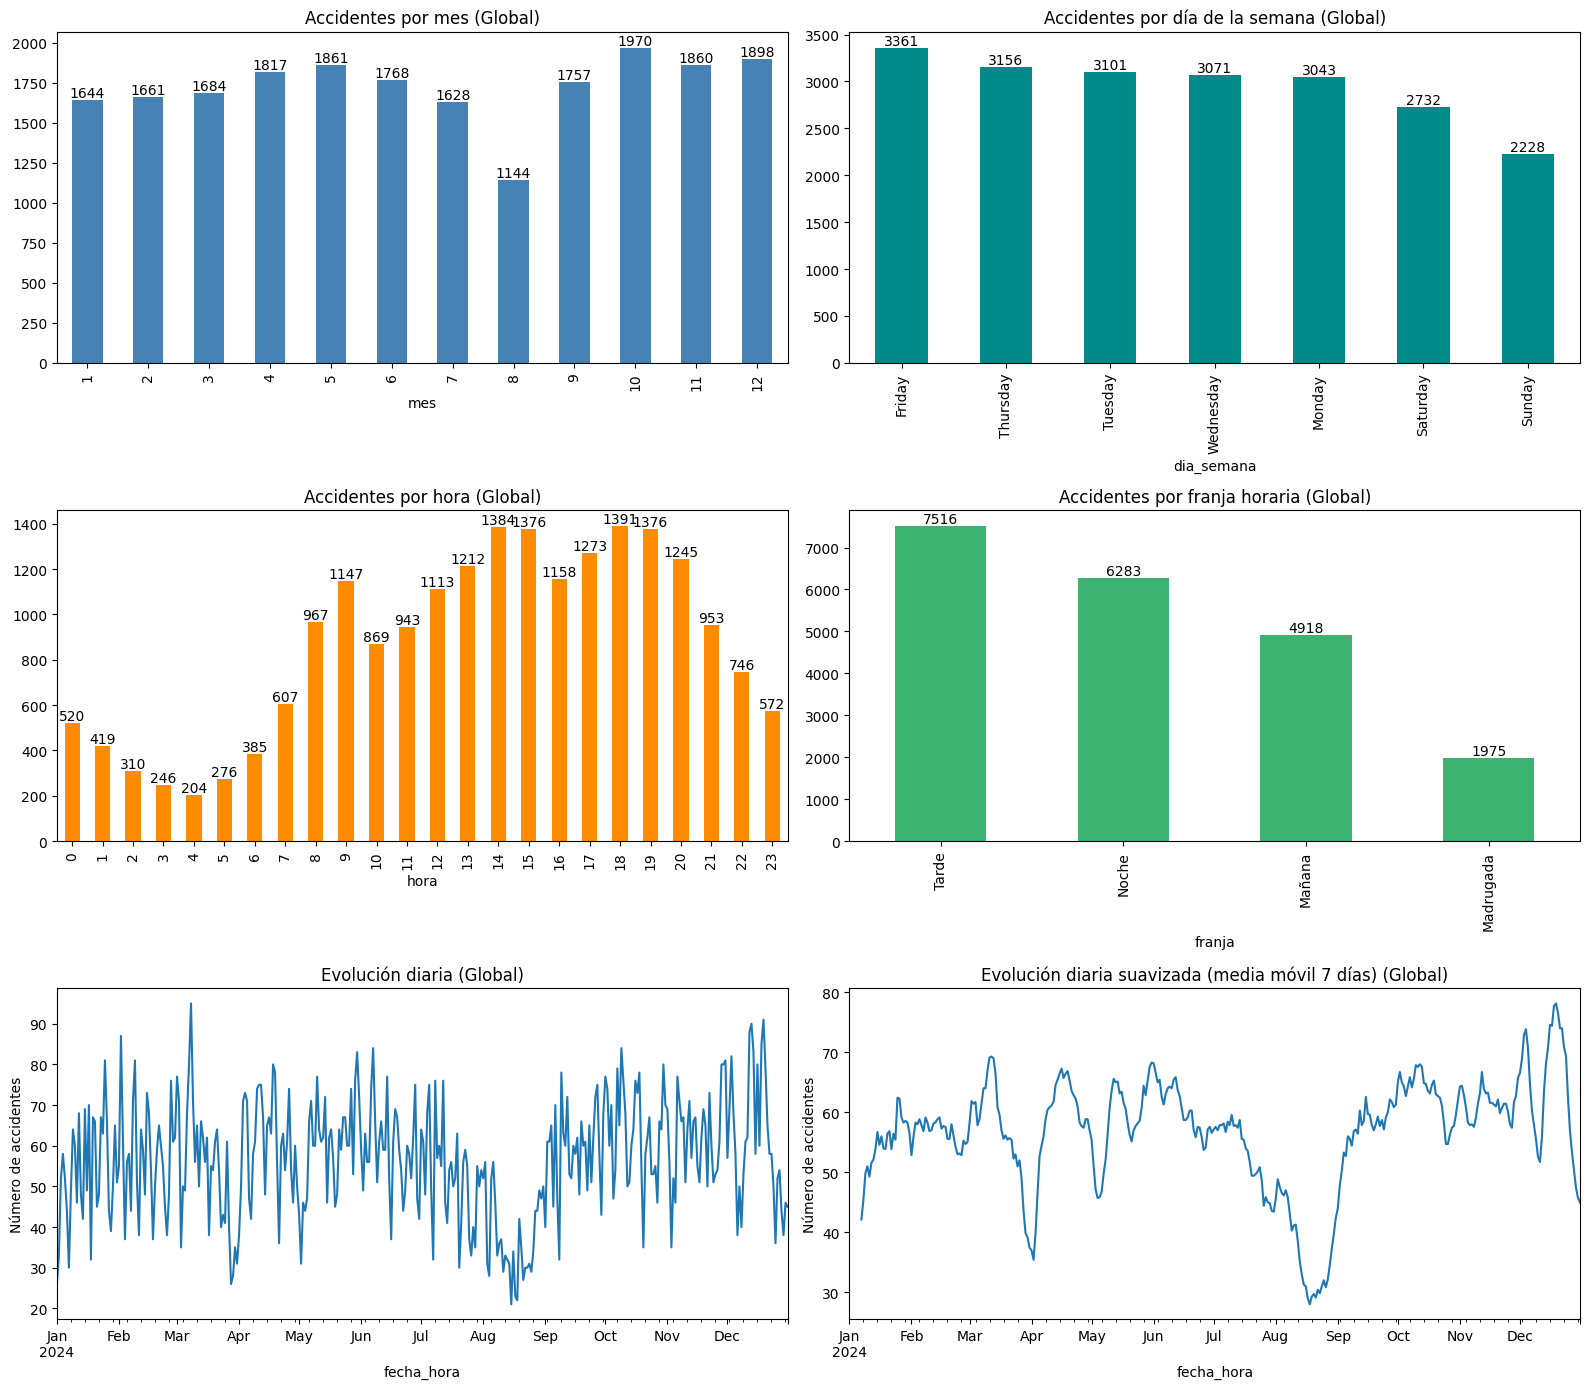

In [28]:
plot_temporal_univariate(df_24_unicos)

In [29]:
#FIGURA 1 (VERSIÓN 2)
#Función de variables temporales (versión 2):

def plot_temporal_univariate_2(df, col_datetime='fecha_hora', por_año=False):
    """
    Gráficos temporales univariantes:
    - Accidentes por mes (barras)
    - Accidentes por día de la semana
    - Accidentes por hora
    - Accidentes por franja horaria
    - Curva mensual ampliada (línea con puntos)
    - Curvas diarias por mes (12 gráficas adicionales)
    """

    if por_año:
        for año, df_año in df.groupby('año'):
            print(f"\n=== Gráficos para el año {año} ===")
            _graficos(df_año, col_datetime, titulo_extra=f"Año {año}")
    else:
        _graficos(df, col_datetime, titulo_extra="Global")


def _graficos(df, col_datetime, titulo_extra=""):

    plt.rcParams.update({'font.size': 18})
    plt.rcParams['axes.titlesize'] = 20
    plt.rcParams['axes.titleweight'] = 'bold'
    plt.rcParams['axes.labelsize'] = 24
    plt.rcParams['xtick.labelsize'] = 20
    plt.rcParams['ytick.labelsize'] = 20
    plt.rcParams['axes.linewidth'] = 1.5

    fig_1 = plt.figure(figsize=(16, 18))

    # 1. Accidentes por mes
    ax_mes = plt.subplot2grid((3, 2), (0, 0))
    freq_mes = (df['mes'].value_counts(normalize=True)*100).sort_index().round(2)
    freq_mes.plot(kind='bar', ax=ax_mes, color="#4A6FA5", rot=45,
                  title=f'Accidentes por mes ({titulo_extra})')
    ax_mes.set_xlabel("Mes")
    ax_mes.set_ylabel("Número de accidentes")
    #ax_mes.bar_label(ax_mes.containers[0])
    total=len(df)
    ax_mes.text(
    0.7, 0.95, f'Total: {total} accidentes únicos', 
    transform=ax_mes.transAxes, 
    ha='right', va='top', fontsize=18)
    #ax_mes.text(0.95,0.93,"(a)", transform=ax_mes.transAxes, fontsize=16)
    ax_mes.set_ylim(0,12)

    # 2. Accidentes por día de la semana
    dias_es = ["Lunes", "Martes", "Miércoles", "Jueves", "Viernes", "Sábado", "Domingo"]
    map_dias = {
    "Monday": "Lunes",
    "Tuesday": "Martes",
    "Wednesday": "Miércoles",
    "Thursday": "Jueves",
    "Friday": "Viernes",
    "Saturday": "Sábado",
    "Sunday": "Domingo"
}
    df['dia_semana_es'] = df['dia_semana'].map(map_dias)

    ax_semana = plt.subplot2grid((3, 2), (0, 1))
    freq_semana = (df['dia_semana_es'].value_counts(normalize=True)*100).reindex(dias_es).round(2)
    freq_semana.plot(kind='bar', ax=ax_semana, color="#D4A017", rot=0,
                     title=f'Accidentes por día de la semana ({titulo_extra})')
    ax_semana.set_xlabel("Día de la semana")
    ax_semana.set_ylabel("Frecuencia (%)")
    #ax_semana.bar_label(ax_semana.containers[0])
    #ax_semana.text(0.95,0.93,"(b)", transform=ax_semana.transAxes, fontsize=16)
    ax_semana.set_ylim(0,20)

    # 3. Accidentes por hora
    ax_hora = plt.subplot2grid((3, 2), (1, 0))
    freq_hora = (df['hora'].value_counts(normalize=True)*100).sort_index().round(1)
    freq_hora.plot(kind='bar', ax=ax_hora, color="#9B1C1F", rot=90,
                   title=f'Accidentes por hora ({titulo_extra})')
    ax_hora.set_xlabel("Hora")
    ax_hora.set_ylabel("Frecuencia (%)")
    #ax_hora.bar_label(ax_hora.containers[0])
    #ax_hora.text(0.95,0.93,"(c)", transform=ax_hora.transAxes, fontsize=16)
    ax_hora.set_ylim(0,8)

    # 4. Accidentes por franja horaria
    orden_franjas = ["Madrugada", "Mañana", "Tarde", "Noche"]

    ax_franja = plt.subplot2grid((3, 2), (1, 1))
    freq_franja = (df['franja'].value_counts(normalize=True)*100).reindex(orden_franjas, fill_value=0).round(2)
    freq_franja.plot(kind='bar', ax=ax_franja, color="#2E2E2E", rot=0,
                     title=f'Accidentes por franja horaria ({titulo_extra})')
    ax_franja.set_xlabel("Franja horaria")
    ax_franja.set_ylabel("Frecuencia (%)")
    #ax_franja.bar_label(ax_franja.containers[0])
    #ax_franja.text(0.95,0.93,"(d)", transform=ax_franja.transAxes, fontsize=16)
    ax_franja.set_ylim(0,40)

    # 5. Curva mensual ampliada
    ax_curva = plt.subplot2grid((3, 2), (2, 0), colspan=2)
    frecuencia_mensual = df[col_datetime].dt.month.value_counts().sort_index()

    meses_es = [
        "Enero", "Febrero", "Marzo", "Abril", "Mayo", "Junio",
        "Julio", "Agosto", "Septiembre", "Octubre", "Noviembre", "Diciembre"
    ]
    meses_plot = [meses_es[i-1] for i in frecuencia_mensual.index]

    ax_curva.plot(
        meses_plot, frecuencia_mensual.values,
        marker="o", linewidth=3, color="darkred"
    )
    ax_curva.set_title(f"Curva de frecuencia mensual ({titulo_extra})", fontsize=16)
    ax_curva.set_xlabel("Mes")
    ax_curva.set_ylabel("Número de accidentes")
    ax_curva.grid(True)
    for i, v in enumerate(frecuencia_mensual.values):
        ax_curva.text(i, v + 45, str(v), ha="center", fontsize=12)
    ax_curva.tick_params(axis="x", rotation=45)
    plt.ylim(750, 2250)
    ax_curva.text(0.97,0.93,"(e)", transform=ax_curva.transAxes, fontsize=16)


    
  
    plt.tight_layout()
    plt.show()

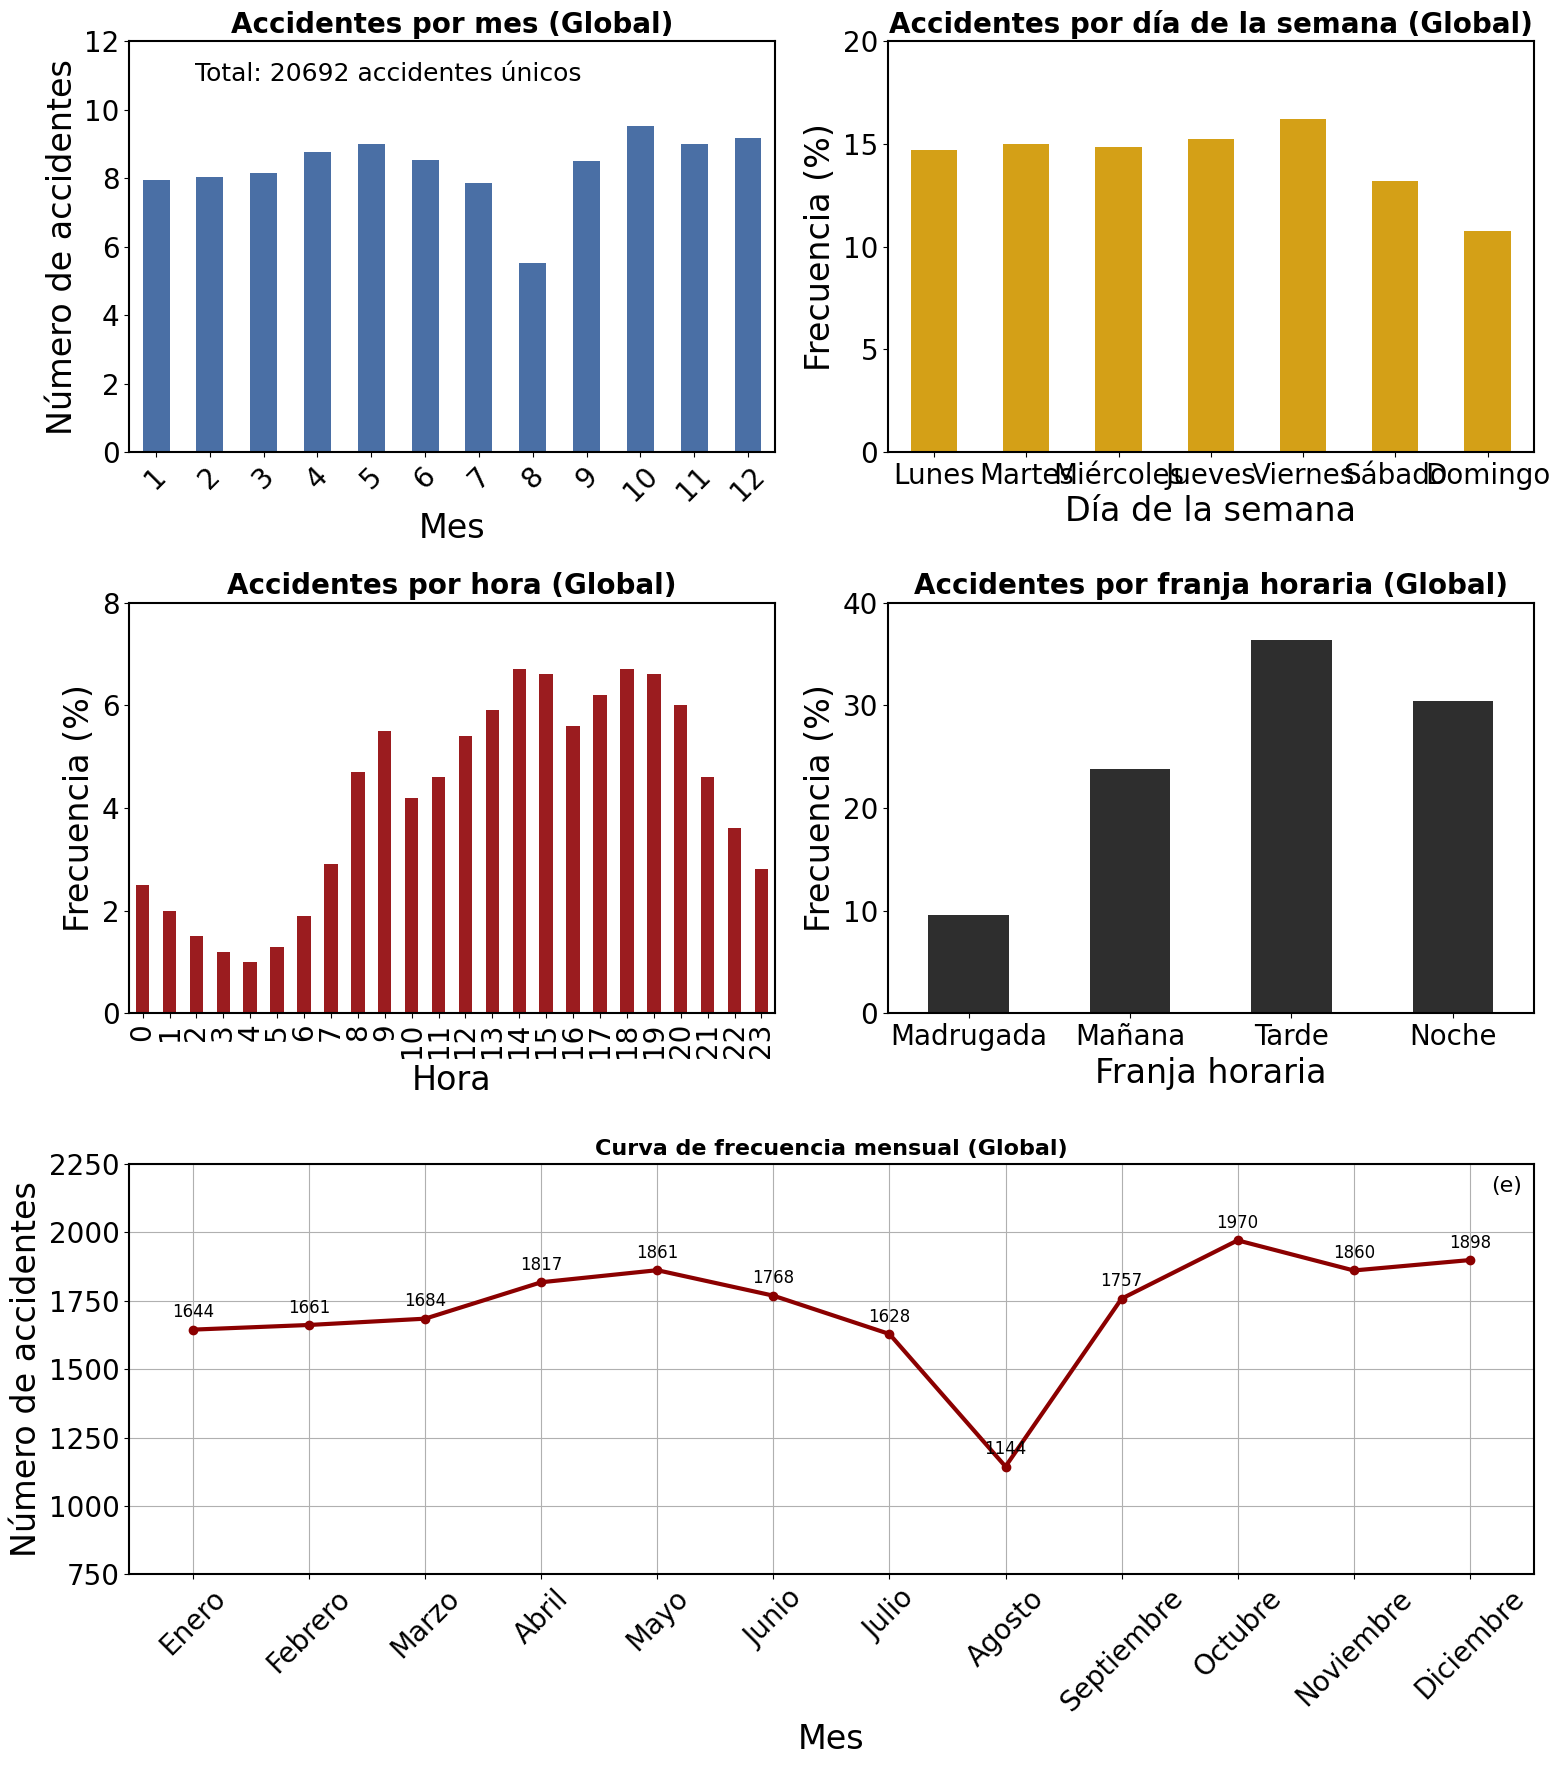

In [30]:
plot_temporal_univariate_2(df_24_unicos)

### Análisis geográfico

Generamos un función que normalizá datos geográficos (localizació y número) para identificar las ubicaciones con mayor siniestralidad (puntos negros):

In [31]:
#Funcion de normalización:


# 1. Funciones de normalización
def normalize_text(s):
    """Normaliza texto: minúsculas, espacios, sin tildes."""
    if pd.isna(s):
        return None
    s = s.lower().strip()
    s = " ".join(s.split())  # elimina dobles espacios
    s = ''.join(
        c for c in unicodedata.normalize('NFD', s)
        if unicodedata.category(c) != 'Mn'
    )
    return s

def normalize_numero(n):
    """Normaliza número de portal, detecta S/N."""
    if pd.isna(n):
        return None
    n = str(n).lower().strip()
    if n in ['s/n', 'sn', 's-n', '']:
        return None
    return n

# 2. Normalización de columnas clave
df = df_24

df['localizacion_norm'] = df['localizacion'].apply(normalize_text)
df['numero_norm'] = df['numero'].apply(normalize_numero)
df['num_expediente'] = df['num_expediente'].astype(str).str.strip()

# eliminar duplicados exactos de num expediente
df = df.drop_duplicates(subset=['num_expediente'])


# 3. Construcción de clave de localización final
df['clave_localizacion'] = (
    df['localizacion_norm'].fillna('') + 'n' +
    df['numero_norm'].fillna('')
).str.strip()

# 4. Detección de puntos negros con distrito
puntos_negros = (
    df.groupby(['localizacion_norm', 'distrito'])['num_expediente']
      .nunique()
      .reset_index(name='n_expedientes')
      .sort_values('n_expedientes', ascending=False)
)

# filtrar solo localizaciones con más de un accidente distinto
puntos_negros = puntos_negros[puntos_negros['n_expedientes'] > 1]

# 5. Resultado final
puntos_negros

C:\Users\aquin\AppData\Local\Temp\ipykernel_19948\361359458.py:45: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(['localizacion_norm', 'distrito'])['num_expediente']


,localizacion_norm,distrito,n_expedientes
1602,"autov. a-2, +00500e",CIUDAD LINEAL,35
3209,"autov. a-42, +00500e",USERA,25
3215,"autov. a-42, +00500s",CARABANCHEL,22
5009,"autov. m-23, 0",MORATALAZ,22
152954,call. fuente carrantona / autov. m-23,MORATALAZ,22
...,...,...,...
94160,"call. antonio lopez, 248a",USERA,2
81473,call. alcala / call. narvaez,SALAMANCA,2
315840,"ronda. toledo, 2",ARGANZUELA,2
315906,"ronda. toledo, 3",CENTRO,2


Dibujamos la frecuencia de accidentes por distrito y los 3 puntos negros (Figura 2):

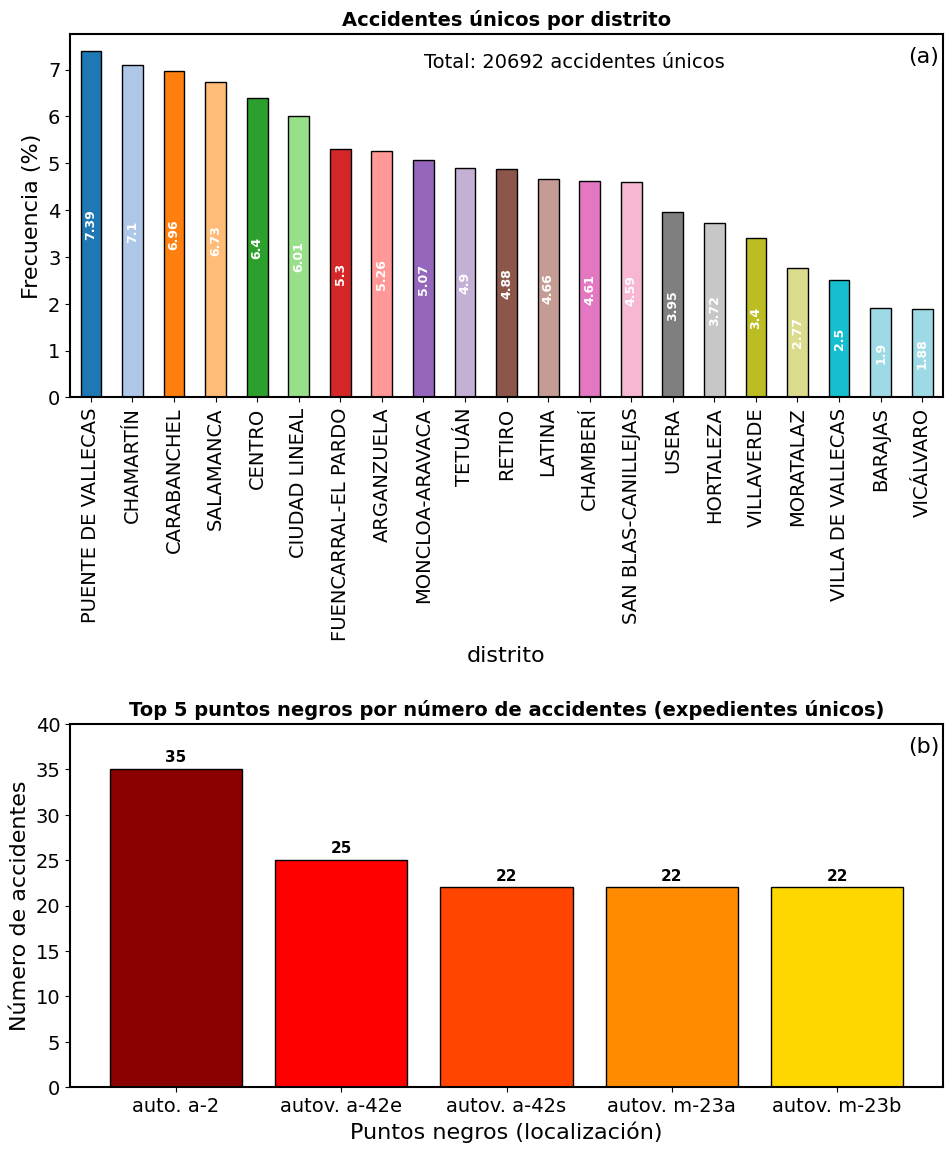

In [41]:
#FIGURA 2

plt.rcParams.update({'font.size': 12})
plt.rcParams['axes.titlesize'] = 14
plt.rcParams['axes.titleweight'] = 'bold'
plt.rcParams['axes.labelsize'] = 16
plt.rcParams['xtick.labelsize'] = 14
plt.rcParams['ytick.labelsize'] = 14
plt.rcParams['axes.linewidth'] = 1.5


fig_2 = plt.figure(figsize=(10, 12))

accidentes_distrito=(df_24_unicos["distrito"].value_counts(normalize = True)*100).round(2)
colores_distritos = plt.cm.tab20(range(len(accidentes_distrito)))

ax1=plt.subplot(2, 1, 1)
ax1=accidentes_distrito.plot(kind="bar", color=colores_distritos, ax =ax1, edgecolor='black')

ax1.set_title("Accidentes únicos por distrito", fontweight='bold')
ax1.set_ylabel("Frecuencia (%)")

for p, value in zip(ax1.patches, accidentes_distrito):
    x = p.get_x() + p.get_width() / 2
    y = p.get_height() / 2   # centrado verticalmente dentro de la barra

    ax1.annotate(
        f"{value}",
        (x, y),
        ha="center", va="center",
        rotation=90,          #  texto tumbado
        fontsize=9, color="white", fontweight="bold"
    )
total=len(df_24_unicos)
ax1.text(
    0.75, 0.95, f'Total: {total} accidentes únicos', 
    transform=ax1.transAxes, 
    ha='right', va='top', fontsize=14)
ax1.text(0.96, 0.92, '(a)', transform=ax1.transAxes, fontsize=16)

# Seleccionar los 5 puntos negros con más accidentes
top5 = puntos_negros.nlargest(5, 'n_expedientes').copy()

# Resetear índice para evitar problemas de posición
top5 = top5.reset_index(drop=True)

ax2 = plt.subplot(2,1,2)
#top5['localizacion_norm']
paleta_top5 = ["#8B0000", "#FF0000", "#FF4500", "#FF8C00", "#FFD700"]
localizaciones=["auto. a-2", "autov. a-42e", "autov. a-42s", "autov. m-23a", "autov. m-23b"]
bars2 = ax2.bar(localizaciones, top5['n_expedientes'], 
                color=paleta_top5, edgecolor='black', linewidth=1)

ax2.set_title('Top 5 puntos negros por número de accidentes (expedientes únicos)')
ax2.set_xlabel("Puntos negros (localización)")
ax2.set_ylabel("Número de accidentes")
ax2.tick_params(axis="x", rotation=0)
ax2.text(0.96, 0.92, '(b)', transform=ax2.transAxes, fontsize=16)
ax2.bar_label(bars2, padding=3, fontweight='bold', fontsize=11)
ax2.set_ylim(0,40)
plt.tight_layout(pad=2.0)
plt.show()


In [33]:
df_24.franja_horaria

0         Tarde
1         Tarde
2         Tarde
3         Tarde
4        Mañana
          ...  
49335    Mañana
49336    Mañana
49337    Mañana
49338     Noche
49339     Noche
Name: franja_horaria, Length: 47277, dtype: category
Categories (4, object): ['Madrugada' < 'Mañana' < 'Tarde' < 'Noche']

In [34]:
top5.localizacion_norm

0                      autov. a-2, +00500e
1                     autov. a-42, +00500e
2                     autov. a-42, +00500s
3                           autov. m-23, 0
4    call. fuente carrantona / autov. m-23
Name: localizacion_norm, dtype: object

### Análisis demográfico

Gráficamos las frecuencias de accidentes en función de datos demográficos: rango de edad, sexo y tipo de persona

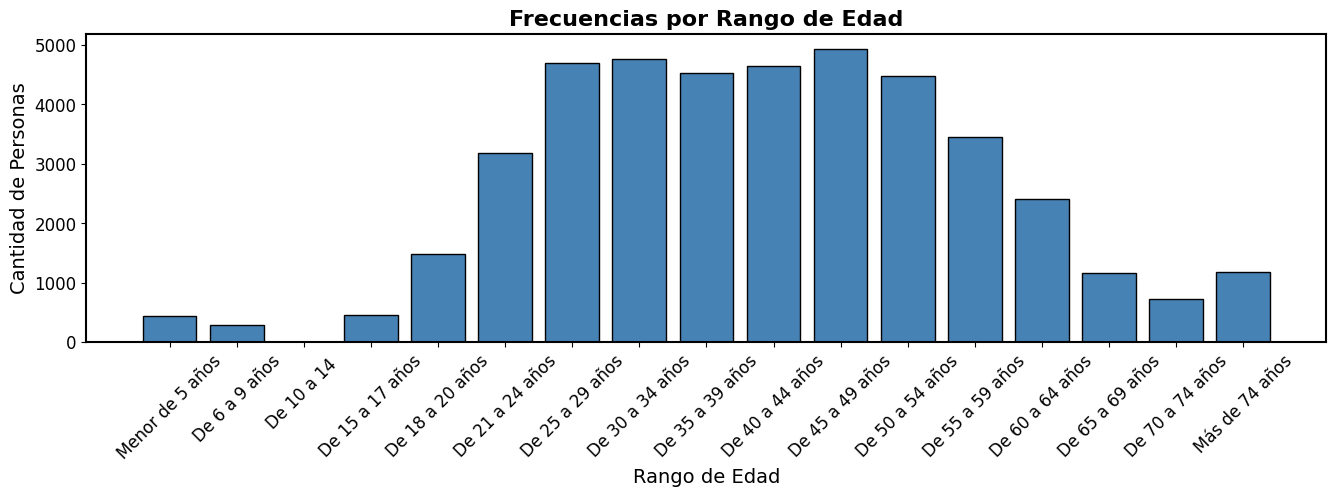

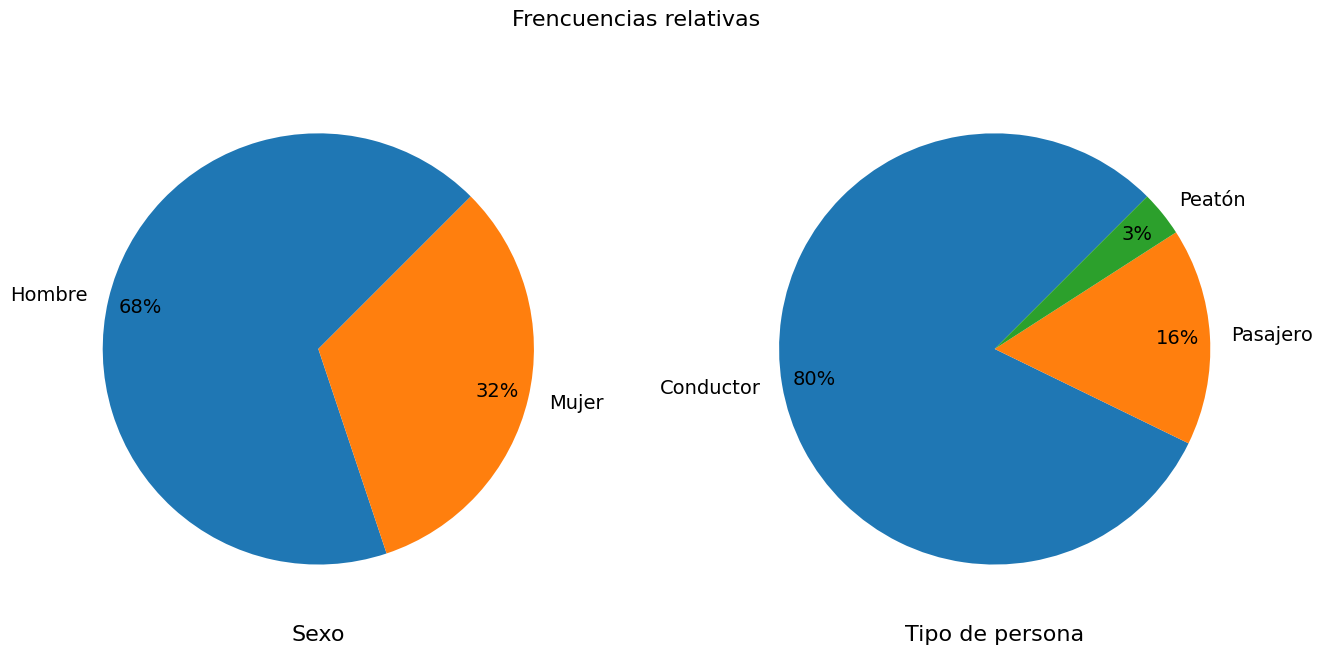

In [35]:
#FIGURA 3 (VERSIÓN 1)
#Sintaxis de python
#Orden correcto de rangos de edad 

edades=df_24.rango_edad.value_counts().sort_index()
fig_3a=plt.figure(figsize=(16,4))
plt.bar(edades.index, edades, color="steelblue", edgecolor="black")
plt.title("Frecuencias por Rango de Edad", fontsize=16) 
plt.xlabel("Rango de Edad", fontsize=14)
plt.ylabel("Cantidad de Personas", fontsize=14)
plt.xticks(fontsize=12, rotation=45) # Rotación por si los nombres son largos
plt.yticks(fontsize=12);

fig_3b, axs=plt.subplots(1, 2, figsize=(16, 7))
pie_kwargs = {
    'autopct': '%1.0f%%',
    'startangle': 45,
    'textprops': {'fontsize': 14}, # Aumenta tamaño de letra (porcentajes y etiquetas)
    'pctdistance': 0.85,           # Posición de los porcentajes (0=centro, 1=borde)
    'labeldistance': 1.1           # Posición de los nombres (1.1 está justo afuera)
}
fig_3b.suptitle("Frencuencias relativas", fontsize=16)
axs[0].set_xlabel("Sexo")
sexo_counts= df_24.sexo.value_counts(normalize=True).drop("Desconocido", errors='ignore')
axs[0].pie(sexo_counts, 
           labels=sexo_counts.index,**pie_kwargs)
axs[1].set_xlabel("Tipo de persona")
axs[1].pie(df_24.tipo_persona.value_counts(normalize=True)*100, 
           labels=df_24.tipo_persona.value_counts().index,**pie_kwargs);


C:\Users\aquin\AppData\Local\Temp\ipykernel_19948\94445246.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  sexo_counts = df_24.groupby('tipo_persona')['sexo'].value_counts(normalize=True)\


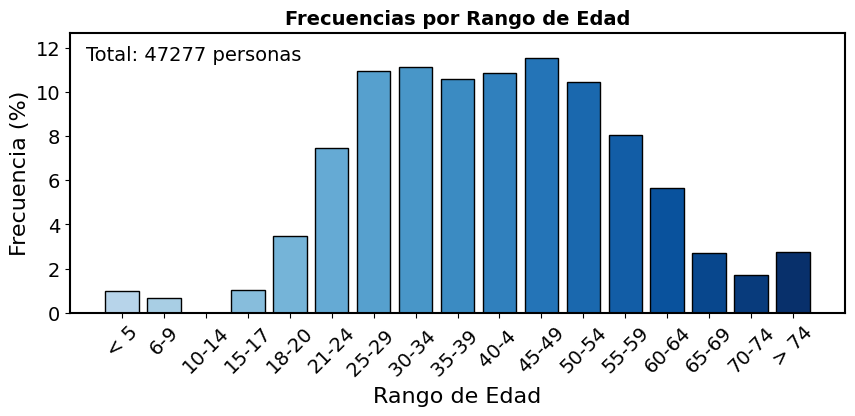

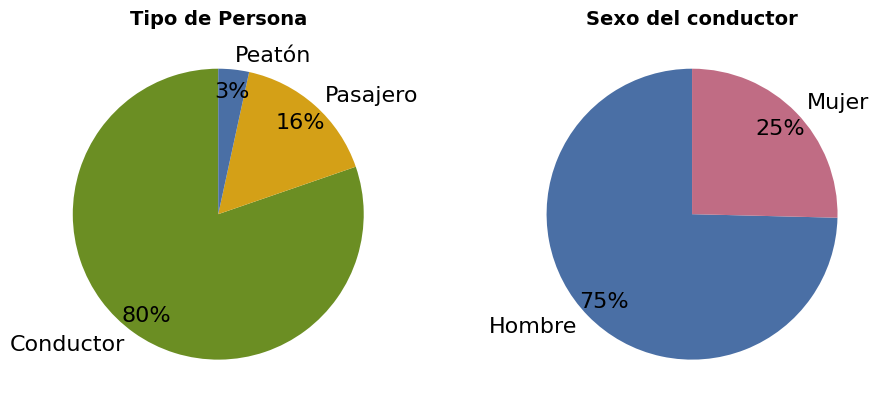

In [36]:
#ANÁLISIS DEMOGRÁFICO
#FIGURA 3 (VERSIÓN 2)


edad_counts = (df_24.rango_edad.value_counts(normalize=True)*100).drop("Desconocido", errors="ignore").sort_index().round(2)
sexo_counts = df_24.groupby('tipo_persona')['sexo'].value_counts(normalize=True)\
    .loc['Conductor'].drop("Desconocido", errors='ignore') #Contabilizamos únicamente el sexo de los conductores
tipo_counts = df_24.tipo_persona.value_counts(normalize=True)

plt.rcParams.update({'font.size': 12})
plt.rcParams['axes.titlesize'] = 14
plt.rcParams['axes.titleweight'] = 'bold'
plt.rcParams['axes.labelsize'] = 16
plt.rcParams['xtick.labelsize'] = 14
plt.rcParams['ytick.labelsize'] = 14
plt.rcParams['axes.linewidth'] = 1.5

fig_3a = plt.figure(figsize=(10,8))


ax1 = plt.subplot(2, 1, 1) #ocupa todo el ancho
colores=plt.cm.Blues(np.linspace(0.3,1,len(edades)))
orden_edad_2 = [
    "< 5",
    "6-9",
    "10-14",
    "15-17",
    "18-20",
    "21-24",
    "25-29 ",
    "30-34 ",
    "35-39 ",
    "40-4 ",
    "45-49",
    "50-54",
    "55-59",
    "60-64",
    "65-69",
    "70-74",
    "> 74"
]
bars=ax1.bar(orden_edad_2, edad_counts, color=colores, edgecolor="black")
ax1.set_title("Frecuencias por Rango de Edad") 
ax1.set_xlabel("Rango de Edad")
ax1.set_ylabel("Frecuencia (%)")
#ax1.bar_label(bars, padding=3, fontsize=14)
total_involucrados=len(df_24)
ax1.text(0.02, 0.90, f"Total: {total_involucrados} personas",
         transform=ax1.transAxes, fontsize=14)
plt.xticks(rotation=45)
#lt.yticks(fontsize=14)
max_val = edad_counts.max()
ax1.set_ylim(bottom=0, top=max_val * 1.1)
#ax1.text(0.96, 0.92, '(a)', transform=ax1.transAxes, fontsize=16)

pie_kwargs = {
    'autopct': '%1.0f%%',
    'startangle': 90,
    'textprops': {'fontsize': 16},
    'pctdistance': 0.85,
    'labeldistance': 1.1
}

fig_3b= plt.figure(figsize=(10, 6))
ax2 = plt.subplot(1, 2, 1) # Fila 1, Columna 2
ax2.pie(tipo_counts, labels=tipo_counts.index, colors=["#6B8E23", "#D4A017", "#4A6FA5"], **pie_kwargs)
ax2.set_title("Tipo de Persona")
#ax2.text(0.9, 0.92, '(b)', transform=ax2.transAxes, fontsize=16)

ax3 = plt.subplot(1, 2, 2) # Fila 1, Columna 1
ax3.pie(sexo_counts, labels=sexo_counts.index, colors=["#4A6FA5", "#C06C84"], **pie_kwargs)
ax3.set_title("Sexo del conductor")
#ax3.text(0.9, 0.92, '(c)', transform=ax3.transAxes, fontsize=16)


plt.tight_layout(pad=4.0) #para que no se solapen
# plt.show()

### Factores asociados al accidente

Gráficamos las frecuencias de accidente por tipos de factores asociados al accidente:

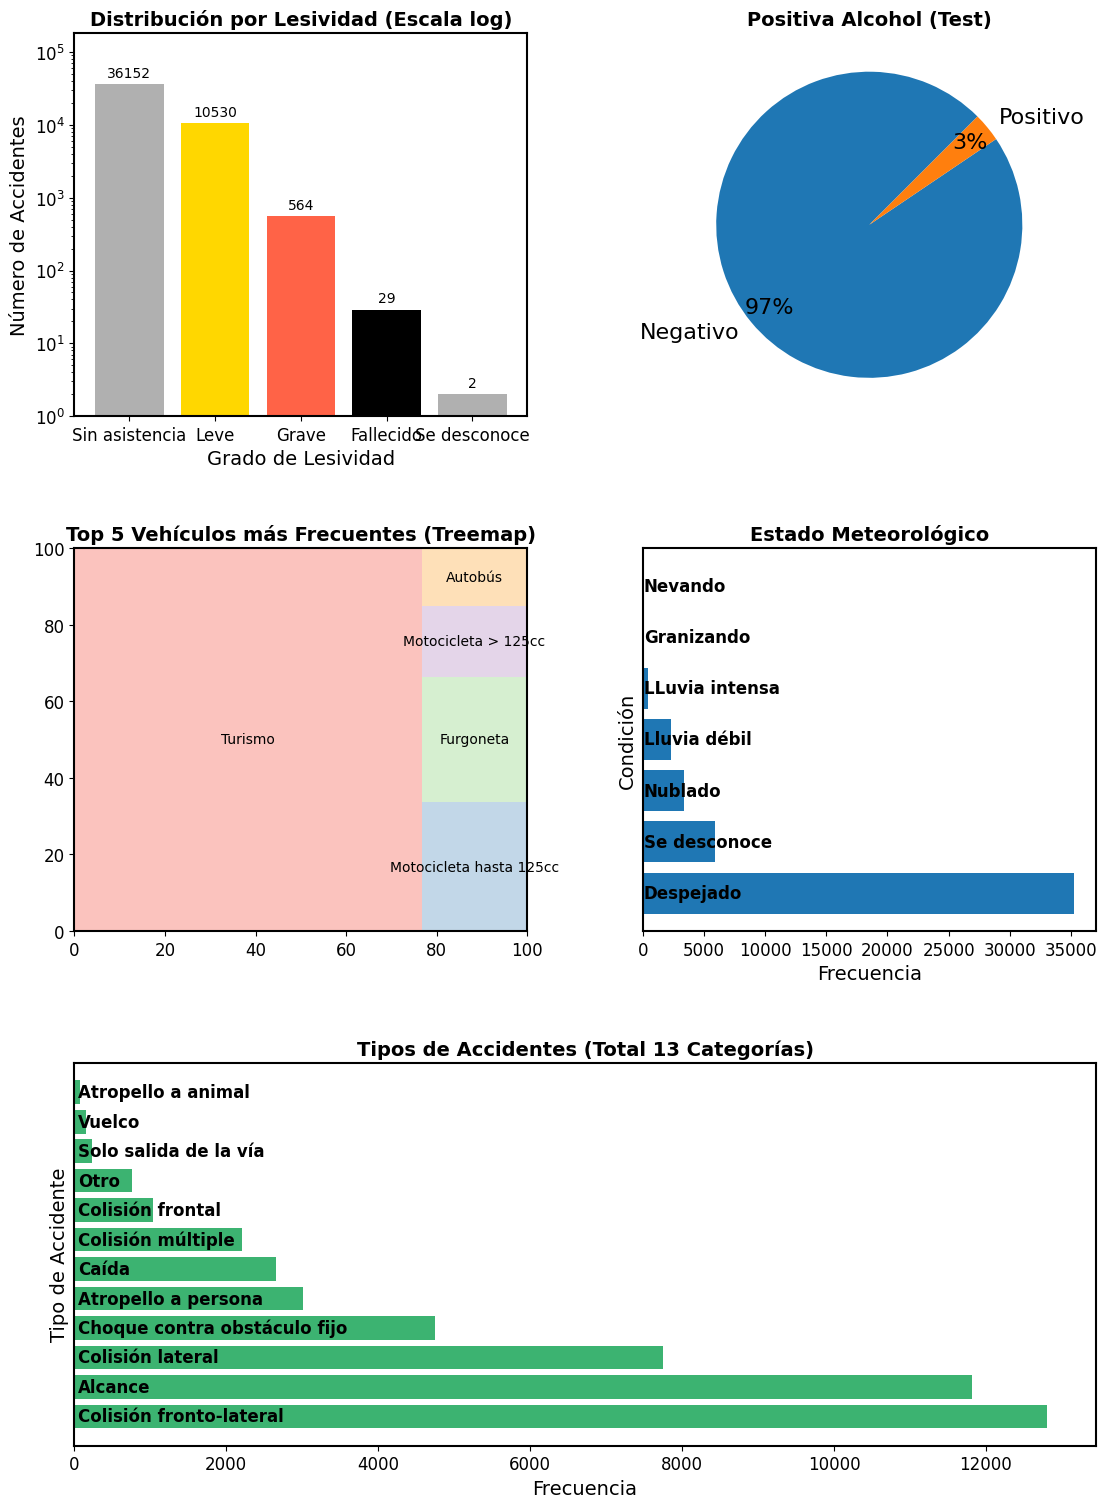

In [37]:
# FIGURA 4 (VERSIÓN 1)
# Variables: lesividad, tipo_accidente, tipo_vehiculo, estado_meteorológico, positiva_alcohol
# Bar Chart: Para tipo_accidente y tipo_vehiculo. 
# Treemap: Si tienes muchas categorías en tipo_vehiculo,un Treemap ayuda a ver visualmente cuáles predominan. 
# Waffle Chart: Muy visual para positiva_alcohol (ej. cuántos de cada 100 dieron positivo).


fig_4 = plt.figure(figsize=(12, 16))

plt.rcParams.update({'font.size': 10})
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

lesividad_counts=df_24.lesividad.value_counts()
lesividad_counts=lesividad_counts.rename({"Sin asistencia sanitaria": "Sin asistencia"})
alcohol_counts=df_24.positiva_alcohol.value_counts().drop("No consta", errors="ignore")
vehiculo_counts=df_24.tipo_vehiculo.value_counts().nlargest(5)
meteo_counts=df_24.estado_meteorológico.value_counts()
tipo_counts=df_24.tipo_accidente.value_counts()

ax1=plt.subplot(3,2,1)
ax1.set_title("Distribución por Lesividad (Escala log)", fontweight='bold')
colores_lesividad = ['#B0B0B0', '#FFD700', '#FF6347', '#000000']
bars=ax1.bar(lesividad_counts.index, lesividad_counts, color=colores_lesividad )
ax1.set_yscale("log")
ax1.set_xlabel('Grado de Lesividad', fontsize=14)
ax1.set_ylabel('Número de Accidentes', fontsize=14)

ax1.bar_label(bars, padding=3, fontsize=10)
max_val = lesividad_counts.max()
ax1.set_ylim(bottom=1, top=max_val * 5)

pie_kwargs = {
    'autopct': '%1.0f%%',
    'startangle': 45,
    'textprops': {'fontsize': 16},
    'pctdistance': 0.85,
    'labeldistance': 1.1
}

ax2=plt.subplot(3,2,2)
ax2.set_title('Positiva Alcohol (Test)', fontweight='bold')
ax2.pie(alcohol_counts, labels=alcohol_counts.index, **pie_kwargs)

ax3=plt.subplot(3,2,3)
ax3.set_title('Top 5 Vehículos más Frecuentes (Treemap)', fontweight='bold')
squarify.plot(sizes=vehiculo_counts.values, label=vehiculo_counts.index, 
              alpha=0.8, ax=ax3, color=plt.cm.Pastel1.colors)

ax4=plt.subplot(3,2,4)
ax4.set_title('Estado Meteorológico', fontweight='bold')
bars4=ax4.barh(meteo_counts.index, meteo_counts)
ax4.set_xlabel('Frecuencia', fontsize=14)
ax4.set_ylabel('Condición', fontsize=14)
ax4.set_yticks([])

for i, bar in enumerate(bars4):
    width = bar.get_width()
    ax4.text(100, i, 
             meteo_counts.index[i], 
             fontsize=12, 
             va='center',     # Centrado verticalmente respecto al grosor de la barra
             ha='left',       # Alineado a la izquierda
             fontweight='bold')   

ax5 = plt.subplot(3,1,3) 
bars5 = ax5.barh(tipo_counts.index, tipo_counts, color='mediumseagreen')
ax5.set_title('Tipos de Accidentes (Total 13 Categorías)', fontweight='bold')
ax5.set_xlabel('Frecuencia', fontsize=14)
ax5.set_ylabel('Tipo de Accidente', fontsize=14)
ax5.set_yticks([])
for i, bar in enumerate(bars5):
    width = bar.get_width()
    ax5.text(50, i, 
             tipo_counts.index[i], 
             fontsize=12, 
             va='center',     # Centrado verticalmente respecto al grosor de la barra
             ha='left',       # Alineado a la izquierda
             fontweight='bold')   
plt.tight_layout(pad=4.0) # Para que no se solapen los títulos


C:\Users\aquin\AppData\Local\Temp\ipykernel_19948\3634141154.py:20: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  vehiculo_counts=df_24.groupby("tipo_persona")["tipo_vehiculo"].value_counts() \
C:\Users\aquin\AppData\Local\Temp\ipykernel_19948\3634141154.py:22: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  alcohol_counts=df_24.groupby("tipo_persona")["positiva_alcohol"].value_counts() \
C:\Users\aquin\AppData\Local\Temp\ipykernel_19948\3634141154.py:85: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matp

<Figure size 1200x1600 with 0 Axes>

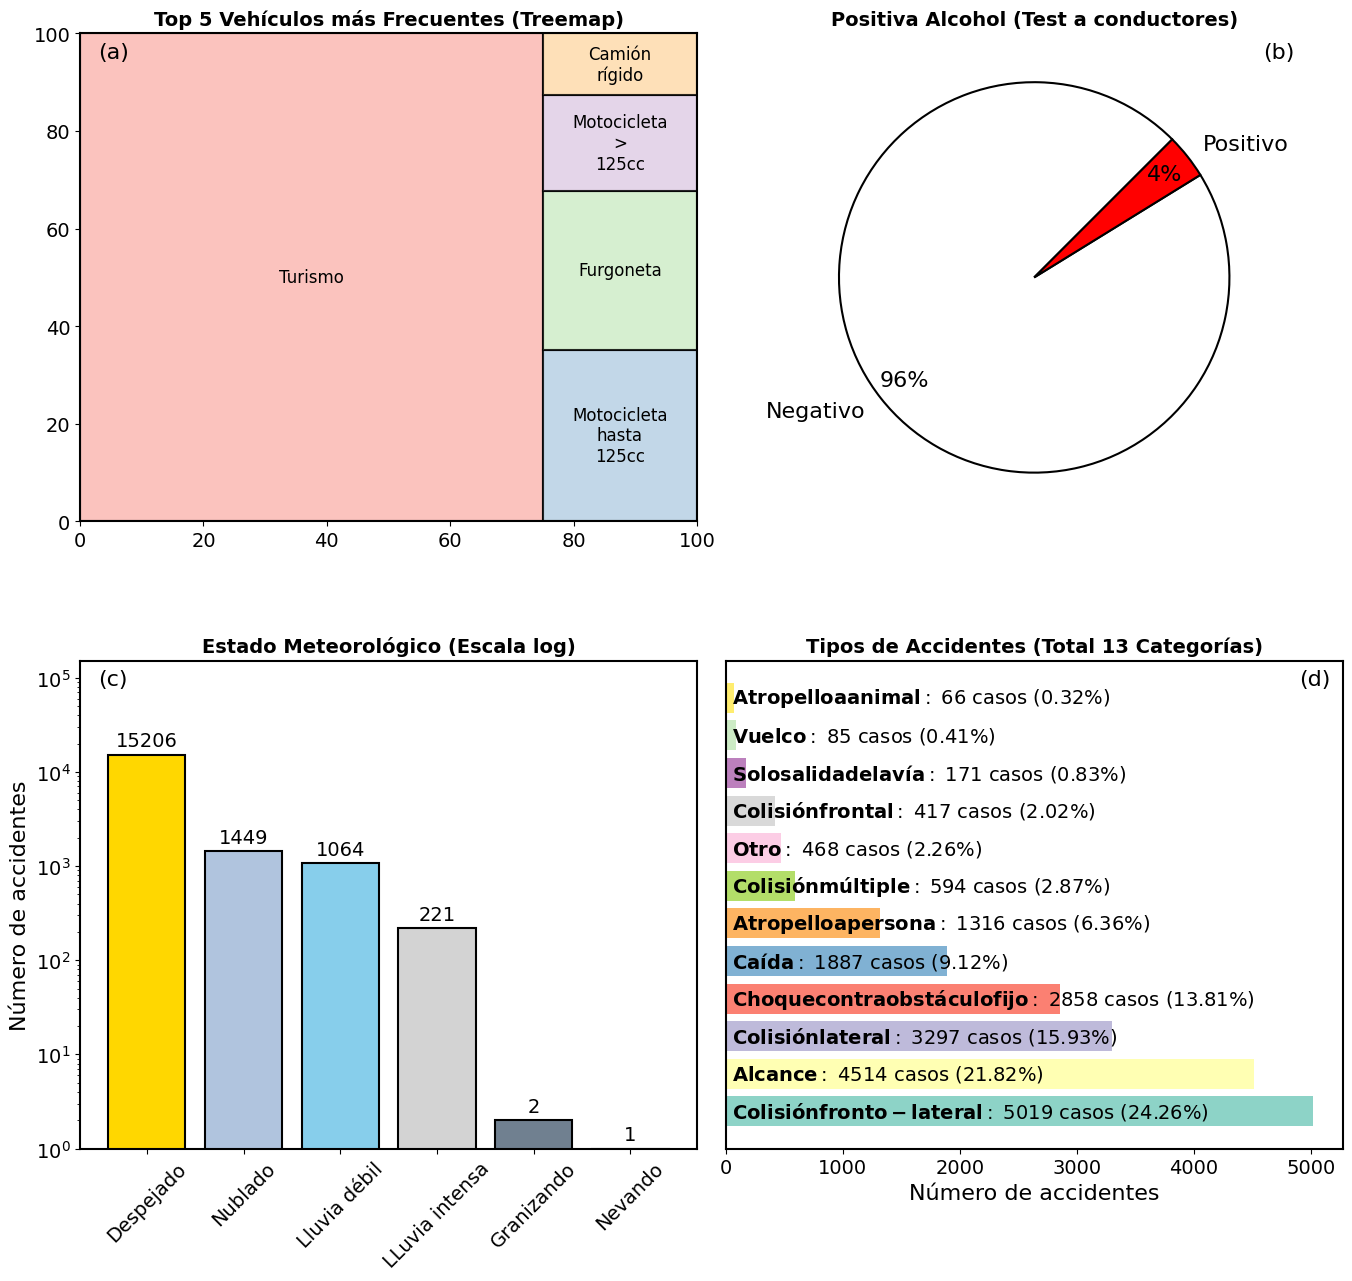

In [38]:
# FIGURA 4 (VERSIÓN 2)
# Variables: lesividad, tipo_accidente, tipo_vehiculo, estado_meteorológico, positiva_alcohol
# Bar Chart: Para tipo_accidente y tipo_vehiculo. 
# Treemap: Si tienes muchas categorías en tipo_vehiculo,un Treemap ayuda a ver visualmente cuáles predominan. 
# Waffle Chart: Muy visual para positiva_alcohol (ej. cuántos de cada 100 dieron positivo).

import matplotlib.cm as cm

fig_4 = plt.figure(figsize=(12, 16))

plt.rcParams.update({'font.size': 12})
plt.rcParams['axes.titlesize'] = 14
plt.rcParams['axes.titleweight'] = 'bold'
plt.rcParams['axes.labelsize'] = 16
plt.rcParams['xtick.labelsize'] = 14
plt.rcParams['ytick.labelsize'] = 14
plt.rcParams['axes.linewidth'] = 1.5


vehiculo_counts=df_24.groupby("tipo_persona")["tipo_vehiculo"].value_counts() \
    .loc["Conductor"].nlargest(5)
alcohol_counts=df_24.groupby("tipo_persona")["positiva_alcohol"].value_counts() \
    .loc["Conductor"].drop("No consta", errors="ignore")
meteo_counts=df_24_unicos.estado_meteorológico.value_counts().drop(["Se desconoce", "No consta"], errors="ignore")
tipo_counts=df_24_unicos.tipo_accidente.value_counts()
tipo_counts_normalizado=(df_24_unicos.tipo_accidente.value_counts(normalize=True)*100).round(2)




pie_kwargs = {
    'autopct': '%1.0f%%',
    'startangle': 45,
    'textprops': {'fontsize': 16},
    'pctdistance': 0.85,
    'labeldistance': 1.1
}

wedge_props = {
    'edgecolor': 'black', # Color de la línea de separación
    'linewidth': 1.5,# Grosor de la línea
    'antialiased': True
}

fig_4 = plt.figure(figsize=(14, 18)) 


ax1 = plt.subplot(3, 2, 1) # (3 filas, 1 columna, posición 2)
ax1.set_title('Top 5 Vehículos más Frecuentes (Treemap)', fontweight='bold')
labels_con_salto = [label.replace(" ", "\n") for label in vehiculo_counts.index]
squarify.plot(sizes=vehiculo_counts.values, label=labels_con_salto, 
              alpha=0.8, ax=ax1, color=plt.cm.Pastel1.colors, edgecolor="black", linewidth=1.5, pad=False)
ax1.text(0.03, 0.95, '(a)', transform=ax1.transAxes, fontsize=16)


#ax1.axis('off') # El treemap no necesita ejes

ax2 = plt.subplot(3, 2, 2)
ax2.set_title('Positiva Alcohol (Test a conductores)', fontweight='bold')
colores_alcohol = ["white", "red"]
ax2.pie(alcohol_counts, labels=alcohol_counts.index, colors=colores_alcohol, wedgeprops=wedge_props, **pie_kwargs)
ax2.text(0.97, 0.95, '(b)', transform=ax2.transAxes, fontsize=16)

ax3 = plt.subplot(3, 2, 3)
ax3.set_title('Estado Meteorológico (Escala log)', fontweight='bold')
mapa_colores_meteo = {
    'Despejado': '#FFD700',
    'Nublado': '#B0C4DE',
    'Lluvia débil': '#87CEEB',
    'Lluvia intensa': '#4682B4',
    'Nevando': '#F0F8FF',
    'Granizando': '#708090'
}
colores_para_grafico = [mapa_colores_meteo.get(cat, '#D3D3D3') for cat in meteo_counts.index]
bars3 = ax3.bar(meteo_counts.index, meteo_counts, color=colores_para_grafico, linewidth=1.5, edgecolor='black') 
ax3.set_yscale("log")
ax3.tick_params(axis='x', rotation=45)
ax3.set_ylabel('Número de accidentes')
ax3.bar_label(bars3, padding=3, fontsize=14)
max_val = meteo_counts.max()
ax3.set_ylim(bottom=1, top=max_val * 10)
ax3.text(0.03, 0.95, '(c)', transform=ax3.transAxes, fontsize=16)

ax4 = plt.subplot(3, 2, 4) 
colores_accidentes = cm.get_cmap('Set3')(range(13))
bars4 = ax4.barh(tipo_counts.index, tipo_counts, color=colores_accidentes)
ax4.set_title('Tipos de Accidentes (Total 13 Categorías)', fontweight='bold')
ax4.set_xlabel("Número de accidentes")
ax4.set_yticks([])
ax4.text(0.93, 0.95, '(d)', transform=ax4.transAxes, fontsize=16)

for i, bar in enumerate(bars4):
    #texto_etiqueta = f"{tipo_counts.index[i]}: {tipo_counts.values[i]} casos"
    texto = f"$\\mathbf{{{tipo_counts.index[i]}}}:$ {tipo_counts.values[i]} casos ({tipo_counts_normalizado[i]}%)"
    ax4.text(50, i, texto, fontsize=14, va='center', ha='left')

plt.tight_layout(pad=1.0)
plt.show();

### Grado de Lesividad

Por último, dibujamos las frecuencias de accidente en función del grado de lesividad (variable más importante)

In [39]:
df_24.lesividad.value_counts()

lesividad
Sin asistencia sanitaria    36152
Leve                        10530
Grave                         564
Fallecido                      29
Se desconoce                    2
Name: count, dtype: int64

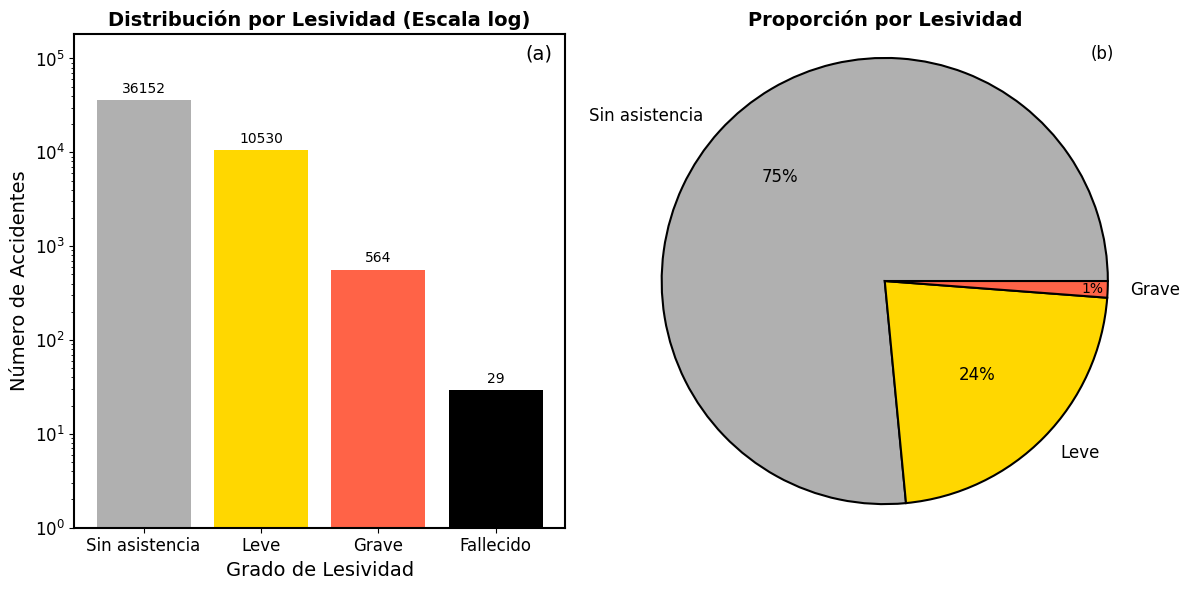

In [40]:
#FIGURA 5

fig_5 = plt.figure(figsize=(12, 6))

plt.rcParams.update({'font.size': 10})
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

lesividad_counts=df_24.lesividad.value_counts().rename({"Sin asistencia sanitaria": "Sin asistencia"})
lesividad_counts = lesividad_counts.drop("Se desconoce", errors='ignore') #Eliminamos el valor "Se desconoce"
Lesividad_sin_fallecido=lesividad_counts.drop(["Fallecido"], errors="ignore")



ax1=plt.subplot(1,2,1)
ax1.set_title("Distribución por Lesividad (Escala log)", fontweight='bold')
colores_lesividad = ['#B0B0B0', '#FFD700', '#FF6347', '#000000']
bars=ax1.bar(lesividad_counts.index, lesividad_counts, color=colores_lesividad )
ax1.set_yscale("log")
ax1.set_xlabel('Grado de Lesividad', fontsize=14)
ax1.set_ylabel('Número de Accidentes', fontsize=14)

ax1.bar_label(bars, padding=3, fontsize=10)
max_val = lesividad_counts.max()
ax1.set_ylim(bottom=1, top=max_val * 5)
ax1.text(0.92, 0.95, '(a)', transform=ax1.transAxes, fontsize=14)

# pie_kwargs = {
#     'autopct': '%1.0f%%',
#     'startangle': 45,
#     'textprops': {'fontsize': 14},
#     'pctdistance': 0.85,
#     'labeldistance': 1.1,
#     'rotatelabels': True
# }

ax2=plt.subplot(1,2,2)
ax2.set_title("Proporción por Lesividad", fontweight='bold')

wedge_props = {'edgecolor': 'black', 'linewidth': 1.5}
ax2.pie(
    Lesividad_sin_fallecido, 
    labels=Lesividad_sin_fallecido.index, 
    colors=colores_lesividad,
    wedgeprops=wedge_props,
)

ax2.axis('equal')

# Identificador (b)
ax2.text(0.92, 0.95, '(b)', transform=ax2.transAxes, fontsize=12)
ax2.text(0.25, 0.7, "75%", transform=ax2.transAxes, fontsize=12)
ax2.text(0.65, 0.3, "24%", transform=ax2.transAxes, fontsize=12)
ax2.text(0.9, 0.475, "1%", transform=ax2.transAxes, fontsize=10)

plt.tight_layout()
plt.show()